# Over-dispersed Age-Period-Cohort Models

We replicate the data example in [Harnau and Nielsen (2017)](https://www.tandfonline.com/doi/full/10.1080/01621459.2017.1366908) in Section 6.

*The work on this vignette was supported by the European Research Council, grant AdG 694262.*

First, we import the package

In [1]:
import apc

In [2]:
# Turn off a FutureWarnings
import warnings
warnings.simplefilter('ignore', FutureWarning)

Next, we create a model and attach the Taylor and Ashe (1983) data to it.

In [3]:
model = apc.Model()
model.data_from_df(apc.loss_TA(), data_format='CL')

## Deviance Analysis (Table 2)

We first consider a deviance analysis. We start with an over-dispersed Poisson model with an age-period-cohort predictor and look for reductions.

In [4]:
model.fit_table('od_poisson_response')
model.deviance_table

,deviance,df_resid,P>chi_sq,LR_vs_APC,df_vs_APC,F_vs_APC,P>F
APC,1.39552e+06,28,0,NaN,NaN,NaN,NaN
AP,1.78058e+06,36,NaN,385058,8,0.965737,0.481777
AC,1.90301e+06,36,NaN,507496,8,1.27281,0.296797
PC,6.86273e+06,36,NaN,5.46721e+06,8,13.7119,7.48102e-08
Ad,2.26976e+06,44,NaN,874238,16,1.09631,0.402678
Pd,7.99075e+06,44,NaN,6.59523e+06,16,8.27051,8.24632e-07
Cd,7.80787e+06,44,NaN,6.41235e+06,16,8.04118,1.10465e-06
A,2.47405e+06,45,NaN,1.07853e+06,17,1.27294,0.277883
P,9.7658e+06,45,NaN,8.37028e+06,17,9.87901,9.8804e-08
C,8.59758e+06,45,NaN,7.20206e+06,17,8.50022,5.02329e-07


First, we see that the age-period-cohort deviance is an extremely unlikely draw from a $\chi^2_{28}$ so a Poisson model is clearly rejected. Thus, we look at the $F$-tests in the column ``F_vs_APC`` and the corresponding p-values. We limit ourselves to nested models that cannot be rejected at the 5% level.

*Remark:
The nesting is nicely illustrated in the following figure, taken from [Nielsen (2014, Figure 5)](http://www.nuffield.ox.ac.uk/economics/papers/2014/apc_deviance.pdf):*

<img src="https://user-images.githubusercontent.com/25103918/42902938-3fc5c6bc-8a9e-11e8-94b6-7406f9a42c29.png" alt="Nested Sub-Models" width="400"/>

*Nielsen (2014) also discusses the individual sub-models and provides their specific parameterizations.*

In [5]:
model.deviance_table[model.deviance_table['P>F'] > 0.05]

,deviance,df_resid,P>chi_sq,LR_vs_APC,df_vs_APC,F_vs_APC,P>F
AP,1.78058e+06,36,NaN,385058,8,0.965737,0.481777
AC,1.90301e+06,36,NaN,507496,8,1.27281,0.296797
Ad,2.26976e+06,44,NaN,874238,16,1.09631,0.402678
A,2.47405e+06,45,NaN,1.07853e+06,17,1.27294,0.277883


The models not rejected at the 5% level include the age-period (AP), age-cohort (AC), age-drift (Ad) and age (A) model. Only the AP and AC model are immediately nested in the APC model with the Ad and A model nested in both of them.

When it comes to forecasting, the age-cohort model has several advantages over the age-period model. Since is does not include a period effect, it does not require parameter extrapolation. Further, in a run-off triangle, the situation we have here, the age-cohort model replicates the chain-ladder point forecasts. Thus, we now take the age-cohort model as the primary model. We can then see what models we can reduce the age-cohort model to.

In [6]:
model.fit_table('od_poisson_response', reference_predictor='AC')
model.deviance_table
model.deviance_table[model.deviance_table['P>F'] > 0.05]

,deviance,df_resid,P>chi_sq,LR_vs_AC,df_vs_AC,F_vs_AC,P>F
Ad,2.26976e+06,44,NaN,366742,8,0.867225,0.552461
A,2.47405e+06,45,NaN,571039,9,1.20028,0.32489


Age-drift and age model are (still) the only feasible reductions.

*Remark (not in paper): we can also consider the age-period model as the new primary model and see what reductions are feasible. This yields the same reductions:*

In [7]:
model.fit_table('od_poisson_response', reference_predictor='AP')
model.deviance_table
model.deviance_table[model.deviance_table['P>F'] > 0.05]

,deviance,df_resid,P>chi_sq,LR_vs_AP,df_vs_AP,F_vs_AP,P>F
Ad,2.26976e+06,44,NaN,489180,8,1.23629,0.306831
A,2.47405e+06,45,NaN,693476,9,1.55787,0.165612


Next, we take the age-drift model as the primary model.

In [8]:
model.fit_table('od_poisson_response', reference_predictor='Ad')
model.deviance_table
model.deviance_table[model.deviance_table['P>F'] > 0.05]

,deviance,df_resid,P>chi_sq,LR_vs_Ad,df_vs_Ad,F_vs_Ad,P>F
A,2.47405e+06,45,NaN,204296,1,3.96035,0.0528199


We can still just about not reject the age model.

Taken together, these results replicate Table 2 in the paper.

## Parameter Estimation and Uncertainty (Table 3, Figure 1)

We move on look at the parameter uncertainty of both Poisson and over-dispersed Poisson models.

First, we fit an over-dispersed Poisson age-period-cohort model

In [9]:
model.fit('od_poisson_response', 'APC')

As part of the estimation, the package attaches a parameter table to the model. This includes parameter estimates, standard errors, $t$ statistics and p-values compared to a $t$ distribution. We take a look at the first couple rows before recreating Table 3 from the paper.

In [10]:
model.parameters.head()

,coef,std_err,t,P>|t|
level,12.787864,NaN,NaN,NaN
slope_age,0.697764,0.435277,1.603033,0.120150
slope_coh,0.111482,0.449524,0.247999,0.805945
dd_age_3,-0.895632,0.220082,-4.069533,0.000349
dd_age_4,0.013571,0.203554,0.066668,0.947320


To recreate Table 3, we further need to estimate an over-dispersed Poisson age-cohort model, and a Poisson age-period-cohort and age-cohort model.

In [11]:
model_ac = model.clone() # this creates a model object with the data already attached
model_ac.fit('od_poisson_response', 'AC')

model_apc_pois = model.clone()
model_apc_pois.fit('poisson_response', 'APC')

model_ac_pois = model.clone()
model_ac_pois.fit('poisson_response', 'AC')

For a Poisson model, the parameter table includes $z$ scores and p-values compared to a normal rather than a $t$ distribution. We look at the first couple rows of the Poisson age-period-cohort model.

In [12]:
model_apc_pois.parameters.head()

,coef,std_err,z,P>|z|
level,12.787864,NaN,NaN,NaN
slope_age,0.697764,0.001950,357.874970,0.000000e+00
slope_coh,0.111482,0.002014,55.365525,0.000000e+00
dd_age_3,-0.895632,0.000986,-908.517521,0.000000e+00
dd_age_4,0.013571,0.000912,14.883527,4.216704e-50


Then we can combine the resulting parameter tables. We recall that the parameter estimates are identical for over-dispersed Poisson and Poisson model.

*Remark: The standard errors do not exactly match those in the paper but give the same impression. This is due to a former bug in the software.*

In [13]:
import pandas as pd
pd.concat([
    pd.concat([
        model.parameters['coef'],
        model_apc_pois.parameters['std_err'].rename('se N'),
        model.parameters['std_err'].rename('se t')
    ], axis=1),
    pd.concat([
        model_ac.parameters['coef'],
        model_ac_pois.parameters['std_err'].rename('se N'),
        model_ac.parameters['std_err'].rename('se t')
    ], axis=1)
], axis=1, keys=['apc model', 'ac model'], sort=False)

apc model                       ac model                    
                coef      se N      se t       coef      se N      se t
level      12.787864       NaN       NaN  12.506405       NaN       NaN
slope_age   0.697764  0.001950  0.435277   0.912526  0.000649  0.149217
slope_coh   0.111482  0.002014  0.449524   0.331272  0.000669  0.153916
dd_age_3   -0.895632  0.000986  0.220082  -0.866222  0.000962  0.221149
dd_age_4    0.013571  0.000912  0.203554   0.020862  0.000900  0.206944
dd_age_5   -0.642054  0.001030  0.229913  -0.657887  0.001021  0.234774
dd_age_6    0.258904  0.001403  0.313113   0.235501  0.001395  0.320795
dd_age_7    0.256459  0.001797  0.401251   0.268782  0.001790  0.411596
dd_age_8   -0.294147  0.002228  0.497467  -0.301633  0.002221  0.510595
dd_age_9    0.705788  0.002865  0.639509   0.791901  0.002855  0.656359
dd_age_10  -1.759462  0.004753  1.061198  -1.793115  0.004744  1.090610
dd_per_3    0.046443  0.002669  0.595830        NaN       NaN       NaN
dd_per_4    0.213822  0.001888  0.421402        NaN       NaN       NaN
dd_per_5    0.211836  0.001513  0.337735        NaN       NaN       NaN
dd_per_6   -0.405308  0.001264  0.282186        NaN       NaN       NaN
dd_per_7    0.354415  0.001215  0.271149        NaN       NaN       NaN
dd_per_8   -0.559004  0.001142  0.255047        NaN       NaN       NaN
dd_per_9    0.556712  0.001195  0.266889        NaN       NaN       NaN
dd_per_10  -0.075721  0.001102  0.246125        NaN       NaN       NaN
dd_coh_3   -0.365437  0.001127  0.251676  -0.341426  0.001105  0.254168
dd_coh_4   -0.025435  0.001120  0.250134  -0.005005  0.001110  0.255236
dd_coh_5   -0.009241  0.001167  0.260439  -0.071485  0.001159  0.266410
dd_coh_6    0.114695  0.001245  0.278036   0.137404  0.001238  0.284553
dd_coh_7    0.053027  0.001291  0.288247   0.051371  0.001281  0.294620
dd_coh_8    0.050816  0.001350  0.301344   0.078993  0.001341  0.308230
dd_coh_9   -0.408218  0.001589  0.354779  -0.365524  0.001575  0.362043
dd_coh_10   0.101509  0.002549  0.568956   0.057498  0.002539  0.583742

We can also plot the parameter estimates, replicating Figure 1.

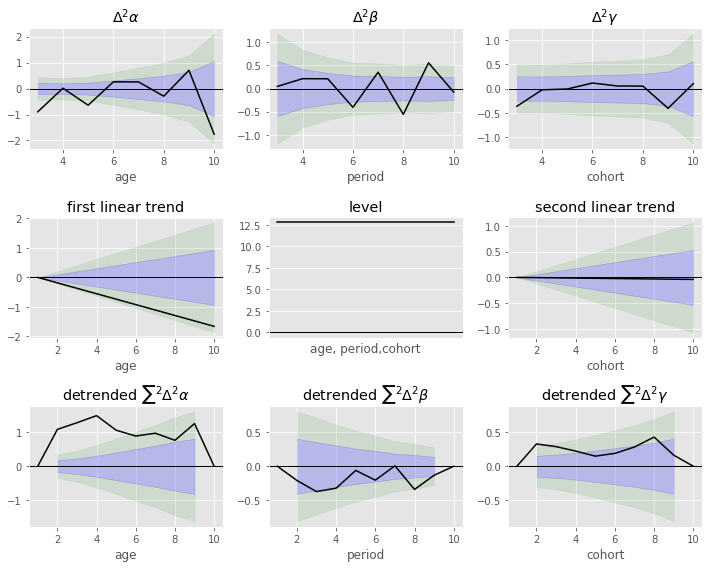

In [14]:
model.plot_parameters(around_coef=False)

Besides plots for the double differences and the detrended version, the plots also include the level, for which there is no confidence band given the sampling scheme, and the trends. We point out that these trends related to the detrended parameterization. Thus, they cannot be interpreted separately, in contrast to the detrended parameters.

*Remark (not in paper): instead, we can also plot the double sums of double differences as shown in equation (3) in the paper. To do this, we merely need to add the argument ``plot_style='sum_sum'`` to ``plot_parameters``. In this case, the trends are de-coupled and can be interpreted separately. However, the interpretation of the double sums is difficult.*

## Forecasting (Table 4)

Finally, we replicate the forecasting results. The package has both the $t$ and the bootstrap forecasts included.

*Remark: The quantiles of the $t$ forecast do not exactly match those in the paper but give the same impression. This is due to a former bug in the software.*

First, we look at the $t$ forecast. If we do not supply the argument ``method`` to ``get_distribution_fc``, $t$ forecasts will be generated.

In [15]:
model_ac.forecast()

Forecast by cell, cohort, age, period, and total are automatically generated. First, we look at the forecasts by period (calendar year). 

In [16]:
model_ac.forecasts['Period'].round()

,point_forecast,se_total,se_process,se_estimation_xi2,se_estimation_tau,q_0.75,q_0.9,q_0.95,q_0.99
Period,,,,,,,,,
11,5226536.0,749213.0,525626.0,492961.0,205007.0,5737024.0,6204644.0,6491431.0,7050492.0
12,4179394.0,711896.0,470031.0,508914.0,163934.0,4664456.0,5108785.0,5381288.0,5912502.0
13,3131668.0,645728.0,406872.0,486139.0,122837.0,3571645.0,3974675.0,4221849.0,4703690.0
14,2127272.0,480308.0,335337.0,333590.0,83441.0,2454537.0,2754320.0,2938174.0,3296578.0
15,1561879.0,405967.0,287338.0,280166.0,61264.0,1838491.0,2091875.0,2247272.0,2550203.0
16,1177744.0,365194.0,249514.0,262631.0,46196.0,1426574.0,1654509.0,1794299.0,2066805.0
17,744287.0,295151.0,198354.0,216605.0,29194.0,945393.0,1129611.0,1242590.0,1462830.0
18,445521.0,251606.0,153463.0,198618.0,17475.0,616957.0,773996.0,870307.0,1058054.0
19,86555.0,108536.0,67642.0,84812.0,3395.0,160507.0,228250.0,269795.0,350785.0


The point-forecast corresponds to the cash-flow by calendar year. Besides, the output includes quantile forecasts, and the standard error and its components:
* ``se_total``: $[\hat{\tau} \{D_1/(n-q)\}\{\hat{\pi}_\mathcal{A} + \hat{s}^2_\mathcal{A} + (\hat{\pi})^2\}]^{1/2}$
* ``se_process``: $[\hat{\tau} \{D_1/(n-q)\}\hat{\pi}_\mathcal{A}]^{1/2}$
* ``se_estimation_xi``: $[\hat{\tau} \{D_1/(n-q)\} \hat{s}^2_\mathcal{A}]^{1/2}$
* ``se_estimation_tau``: $[\hat{\tau} \{D_1/(n-q)\} (\hat{\pi}_\mathcal{A})^2]^{1/2}$

Similarly, we can look at forecasts by cohort

In [17]:
model_ac.forecasts['Cohort'].round()

,point_forecast,se_total,se_process,se_estimation_xi2,se_estimation_tau,q_0.75,q_0.9,q_0.95,q_0.99
Cohort,,,,,,,,,
2,94634.0,110371.0,70728.0,84649.0,3712.0,169837.0,238725.0,280973.0,363332.0
3,469511.0,216576.0,157541.0,147468.0,18416.0,617079.0,752254.0,835156.0,996764.0
4,709638.0,261515.0,193681.0,173502.0,27835.0,887825.0,1051049.0,1151153.0,1346295.0
5,984889.0,304298.0,228173.0,197591.0,38632.0,1192227.0,1382154.0,1498635.0,1725701.0
6,1419459.0,375938.0,273925.0,251386.0,55677.0,1675611.0,1910252.0,2054155.0,2334679.0
7,2177641.0,496599.0,339284.0,352422.0,85416.0,2516006.0,2825958.0,3016048.0,3386608.0
8,3920301.0,791908.0,455229.0,629476.0,153771.0,4459880.0,4954148.0,5257277.0,5848196.0
9,4278972.0,1049093.0,475597.0,919909.0,167840.0,4993788.0,5648578.0,6050153.0,6832983.0
10,4625811.0,1984981.0,494497.0,1913818.0,181444.0,5978309.0,7217231.0,7977049.0,9458235.0


and for the total

In [18]:
model_ac.forecasts['Total'].round()

,point_forecast,se_total,se_process,se_estimation_xi2,se_estimation_tau,q_0.75,q_0.9,q_0.95,q_0.99
Total,18680856.0,2952921.0,993729.0,2682412.0,732744.0,20692875.0,22535935.0,23666265.0,25869724.0


Next, we compute distribution forecasts based on the bootstrap by England and Verrall (1999) and England (2002). Since bootstrapping requires random sampling, the results differ somewhat from those in the paper. We note that the bootstrap does not have a solid theoretical foundation.

In [19]:
fc_bootstrap = apc.bootstrap_forecast(apc.loss_TA(), seed=1)

Just as for the $t$ forecast, this automatically computes forecasts by cell, age, period, cohort and for the total. The output for the bootstrap forecasts contains descriptive statistics over bootstrap draws:

In [20]:
fc_bootstrap['Period'].round()

,count,mean,std,min,50%,75%,90%,95%,99%,max
Period,,,,,,,,,,
11,999.0,5203999.0,829641.0,2926417.0,5144427.0,5762222.0,6254180.0,6590469.0,7262189.0,8319387.0
12,999.0,4153410.0,759793.0,2021208.0,4139537.0,4624053.0,5168286.0,5440464.0,6056917.0,7456182.0
13,999.0,3142845.0,713375.0,1311819.0,3101645.0,3608460.0,4085611.0,4416031.0,4909628.0,5911036.0
14,999.0,2119326.0,508279.0,913750.0,2083975.0,2445325.0,2785607.0,3003399.0,3453377.0,3976919.0
15,999.0,1545178.0,455274.0,507736.0,1511352.0,1825142.0,2136125.0,2332187.0,2847346.0,3155313.0
16,999.0,1170091.0,394602.0,245565.0,1125245.0,1424747.0,1716499.0,1858683.0,2204893.0,2653666.0
17,999.0,746713.0,348868.0,-100513.0,697799.0,957036.0,1217316.0,1399849.0,1679438.0,2560591.0
18,999.0,446096.0,280466.0,-114902.0,392203.0,578785.0,820631.0,986236.0,1278147.0,1775041.0
19,999.0,87893.0,134991.0,-430840.0,45298.0,120367.0,270958.0,365589.0,562607.0,1140665.0


In contrast to the $t$ forecast, the bootstrap comes with a mean forecast that differs from the chain-ladder point forecast. Also, the reported bootstrap standard deviation differs from the bootstrapped chain-ladder standard error since it is computed around the bootstrap mean, not the chain-ladder point forecast.

Just as before, we can look at forecasts aggregated by cohort and for the total.

In [21]:
fc_bootstrap['Cohort'].round()

,count,mean,std,min,50%,75%,90%,95%,99%,max
Cohort,,,,,,,,,,
2,999.0,99932.0,133943.0,-353238.0,60208.0,147604.0,268642.0,374220.0,611144.0,786161.0
3,999.0,469351.0,254392.0,-118315.0,428713.0,627686.0,798055.0,911724.0,1244976.0,2232640.0
4,999.0,700233.0,302688.0,93328.0,661154.0,879059.0,1089169.0,1243316.0,1634851.0,1902108.0
5,999.0,1001183.0,352004.0,246163.0,954864.0,1202015.0,1462714.0,1645972.0,2002757.0,2314298.0
6,999.0,1411220.0,427463.0,399122.0,1367368.0,1695548.0,1946368.0,2147654.0,2525025.0,3483236.0
7,999.0,2160578.0,541155.0,839328.0,2116195.0,2492633.0,2906799.0,3139106.0,3604324.0,3993580.0
8,999.0,3886857.0,852271.0,1708823.0,3801465.0,4444893.0,5032850.0,5424910.0,6016739.0,8124079.0
9,999.0,4268894.0,1092751.0,1077711.0,4184782.0,4935941.0,5701416.0,6277549.0,7211547.0,8344057.0
10,999.0,4617302.0,1998469.0,300744.0,4408087.0,5795458.0,7334020.0,8224876.0,9951241.0,13342088.0


In [22]:
fc_bootstrap['Total'].round()

,count,mean,std,min,50%,75%,90%,95%,99%,max
Total,999.0,18615551.0,2980270.0,10971577.0,18503493.0,20384311.0,22654087.0,23854419.0,26481398.0,29652589.0


Taken together, this replicates Table 4.

### Forecasting with smaller models (not in paper)

In the deviance analysis we found that we cannot reject a reduction to an age-drift or even an age model. Since the age-cohort model replicates the chain-ladder point forecasts we have so far not considered forecasts resulting from the smaller models. However, this is easily done.

In [23]:
model_ad = model.clone()
model_ad.fit('od_poisson_response', 'Ad')
model_ad.forecast()

model_a = model.clone()
model_a.fit('od_poisson_response', 'A')
model_a.forecast()

We can now compare the forecasts of the three models. We look at the forecasts for the total, but we could just as easily look at other aggregates or forecasts by cells.

In [24]:
print('Age-Cohort Model')
model_ac.forecasts['Total'].round()

Age-Cohort Model


,point_forecast,se_total,se_process,se_estimation_xi2,se_estimation_tau,q_0.75,q_0.9,q_0.95,q_0.99
Total,18680856.0,2952921.0,993729.0,2682412.0,732744.0,20692875.0,22535935.0,23666265.0,25869724.0


In [25]:
print('Age-Drift Model')
model_ad.forecasts['Total'].round()

Age-Drift Model


,point_forecast,se_total,se_process,se_estimation_xi2,se_estimation_tau,q_0.75,q_0.9,q_0.95,q_0.99
Total,19846937.0,2467485.0,1011836.0,2115010.0,769028.0,21525090.0,23057357.0,23992879.0,25803777.0


In [26]:
print('Age Model')
model_a.forecasts['Total'].round()

Age Model


,point_forecast,se_total,se_process,se_estimation_xi2,se_estimation_tau,q_0.75,q_0.9,q_0.95,q_0.99
Total,16676254.0,1565677.0,957519.0,1043789.0,667087.0,17740884.0,18712650.0,19305694.0,20452847.0


We can see that age-cohort and age-drift model yield quite similar results, especially when we look at the higher quantiles. In contrast, the age model produces substantially lower forecasts.

## References

* England, P., & Verrall, R. (1999). Analytic and bootstrap estimates of prediction errors in claims reserving. *Insurance: Mathematics and Economics*, 25(3), 281–293. 
* England, P. D. (2002). Addendum to “Analytic and bootstrap estimates of prediction errors in claims reserving.” *Insurance: Mathematics and Economics*, 31(3), 461–466. 
* Harnau, J., & Nielsen, B. (2017). Over-Dispersed Age-Period-Cohort Models. *Journal of the American Statistical Association.* [Published online](https://www.tandfonline.com/doi/full/10.1080/01621459.2017.1366908)
* Nielsen, B. (2014). Deviance analysis of age-period-cohort models. Nuffield Discussion Paper, (W03). [Download](http://www.nuffield.ox.ac.uk/economics/papers/2014/apc_deviance.pdf)
* Taylor, G. C., & Ashe, F. R. (1983). Second moments of estimates of outstanding claims. *Journal of Econometrics*, 23(1), 37–61. 